In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.offline as plyo
import cufflinks as cf

In [106]:
url = 'https://github.com/jwkuyper/IOWA_test/blob/main/Dataset_V1.xlsx?raw=true'
df = pd.read_excel(url,sheet_name='Sheet1', parse_dates=['date'] )
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,positive_rate,stringency_index,population,population_density,median_age,gdp_per_capita,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,38928341.0,54.422,18.6,1803.987,NaN,NaN,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,38928341.0,54.422,18.6,1803.987,NaN,NaN,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,38928341.0,54.422,18.6,1803.987,NaN,NaN,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,38928341.0,54.422,18.6,1803.987,NaN,NaN,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,38928341.0,54.422,18.6,1803.987,NaN,NaN,0.5,64.83


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50350 entries, 0 to 50349
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   iso_code                    50350 non-null  object        
 1   continent                   50350 non-null  object        
 2   location                    50350 non-null  object        
 3   date                        50350 non-null  datetime64[ns]
 4   total_cases                 50350 non-null  float64       
 5   new_cases                   50350 non-null  float64       
 6   total_deaths                50350 non-null  float64       
 7   new_deaths                  50350 non-null  float64       
 8   total_cases_per_million     50350 non-null  float64       
 9   new_cases_per_million       50350 non-null  float64       
 10  total_deaths_per_million    50350 non-null  float64       
 11  new_deaths_per_million      50350 non-null  float64   

In [107]:
# Filling all the null/NaN values of new* with 0
def FillNullWithZero(Dataframe, ColName):
    if ColName.startswith("new") or ColName.startswith("total") or "smokers" in ColName:
        Dataframe = Dataframe.fillna(value = {ColName:0})
    else:
        pass
    return Dataframe

for i in range(len(df.columns)):
    df = FillNullWithZero(df, df.columns[i])

In [108]:
#Dropping the rows which does not have any continent 
#Comment to be deleted: Dropping these 586 entries as these are identified as World and International, also most of their other features are all null
df.drop(df[df.continent.isnull()].index, inplace=True)

#comment TBD: My recommendation is to ddrop positive_rate column too.
df = df.drop("positive_rate", axis=1)

df = df.fillna(value={"stringency_index": df.stringency_index.mean(),
                      "population_density": df.population_density.min(),
                      "median_age": df.median_age.mean(),
                      "gdp_per_capita":df.gdp_per_capita.mean(),
                      "hospital_beds_per_thousand":df.hospital_beds_per_thousand.mean(),
                      "life_expectancy": df.life_expectancy.mean()
                     }
              )

In [109]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [110]:
print(df[df.isnull().any(axis=1)][null_columns].head(10))

Empty DataFrame
Columns: []
Index: []


In [117]:
df2 = df.copy()

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50350 entries, 0 to 50349
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   iso_code                    50350 non-null  object        
 1   continent                   50350 non-null  object        
 2   location                    50350 non-null  object        
 3   date                        50350 non-null  datetime64[ns]
 4   total_cases                 50350 non-null  float64       
 5   new_cases                   50350 non-null  float64       
 6   total_deaths                50350 non-null  float64       
 7   new_deaths                  50350 non-null  float64       
 8   total_cases_per_million     50350 non-null  float64       
 9   new_cases_per_million       50350 non-null  float64       
 10  total_deaths_per_million    50350 non-null  float64       
 11  new_deaths_per_million      50350 non-null  float64   

In [118]:
def CreateCorrPlot(df2):
    sns.set(style="black")
    f, ax = plt.subplots(figsize=(11, 9))
    
    sns.heatmap(df2.corr()
                ,mask=np.triu(np.ones_like(df2.corr(), dtype=np.bool))
                ,cmap=sns.diverging_palette(220, 10, as_cmap=True)
                ,vmax=.3, center=0
                ,square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

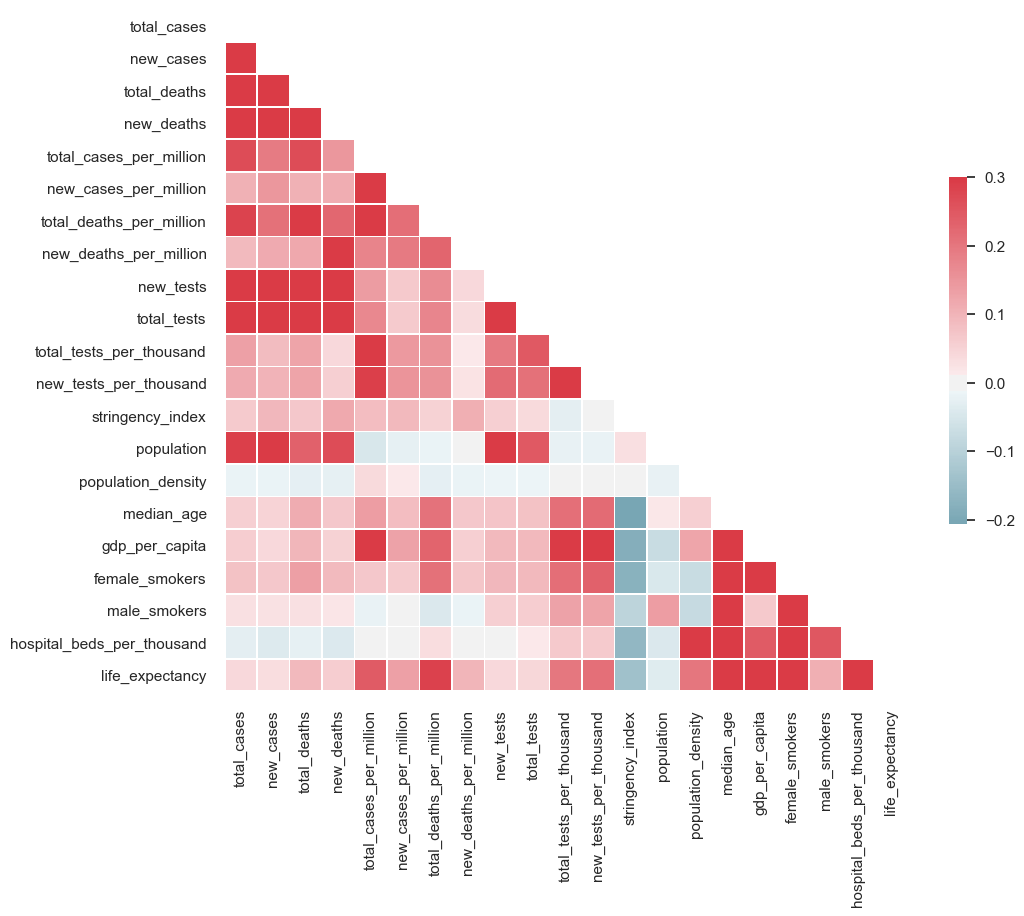

In [119]:
createCorrelationPlot(df2[list(df.columns)])

In [123]:
series = df2[(df2.location=="World")]
series = df2.groupby('date').total_deaths.sum()
plyo.iplot(series.iplot(asFigure=True
                          ,title='World Deaths Over Time'
                          ,theme='polar'
                          ,xTitle='Date'
                          ,yTitle='Total Deaths'))

In [7]:
df.iso_code = pd.Categorical(df.iso_code)

In [8]:
df.iso_code = df.iso_code.cat.codes

In [9]:
df.sample(n=10, replace=False).to_csv(path_or_buf= 'sample.csv', index=False)

In [10]:
df.drop(['continent', 'location', 'date'], axis=1,inplace=True)

In [11]:
features = list(df.columns)
features.remove('new_cases')
features

['iso_code',
 'total_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'gdp_per_capita',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [12]:
target = "new_cases"

In [42]:
X =df[features]
y = df[target]

In [43]:
from sklearn.model_selection import train_test_split      # train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression #linear regression
lr=LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
lr.score(X_train,y_train)

0.8789884207297399

In [77]:
print(lr.score(X_test,y_test))

0.8866321603945762


In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)

In [80]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
knn.score(X_train,y_train)

0.44881097399502146

In [82]:
knn.score(X_test,y_test)

0.32801080394026055

In [83]:
d = {"iso_code": 103,
"total_cases": 32364,
"total_deaths": 548,
"new_deaths": 6,
"total_cases_per_million": 601.882,
"new_cases_per_million": 4.575,
"total_deaths_per_million": 10.191,
"new_deaths_per_million": 0.112,
"new_tests": 3381,
"total_tests": 425364,
"total_tests_per_thousand": 7.911,
"new_tests_per_thousand": 0.063,
"stringency_index": 70.37,
"population": 53771300,
"population_density": 87.324,
"median_age": 20,
"gdp_per_capita": 2993.028,
"female_smokers": 1.2,
"male_smokers": 20.4,
"hospital_beds_per_thousand": 1.4,
"life_expectancy": 66.7}

new_case = [d["iso_code"], d["total_cases"], d["total_deaths"], d["new_deaths"],
            d["total_cases_per_million"], d["new_cases_per_million"], d["total_deaths_per_million"],
            d["new_deaths_per_million"], d["new_tests"], d["total_tests"], d["total_tests_per_thousand"],
            d["new_tests_per_thousand"], d["stringency_index"], d["population"], d["population_density"],
            d["median_age"], d["gdp_per_capita"], d["female_smokers"], d["male_smokers"], d["hospital_beds_per_thousand"],
            d["life_expectancy"]]
X_new = [new_case]
knn.predict(X_new)

array([213.])